<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic11/Chollet_HFST11a_text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

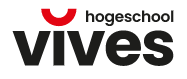<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# 11. Deep learning for text: Text preprocessing

Deze notebook bevat de codevoorbeelden (met aanvullende uitleg) uit het eerste deel van hoofdstuk 11 van het boek "Deep Learning with Python" (2e editie) van François Chollet, nl.:
- paragraaf 11.1 waarin wordt uitgelegd wat NLP is,
- paragraaf 11.2 over het omzetten van tekstdata naar numerieke tensors.

## 11.1. Natural-language processing: The bird's eye view

**Programmeertalen** (bv. Assembler, Python, XML, Lisp): eerst worden de regels bedacht, daarna worden ze toegepast.

**Natuurlijke talen** (bv. Nederlands, Engels): regels werden nadien afgeleid (= linguïstiek of taalkunde).

**Natural Language Processing** (NLP): *Using machine learning and large datasets to
give computers the ability not to understand language, but
to ingest a piece of language as input and return something useful, like predicting the
following:*

- “What’s the topic of this text?” (**text classification**)
- “Does this text contain abuse?” (**content filtering**)
- “Does this text sound positive or negative?” (**sentiment analysis**)
- “What should be the next word in this incomplete sentence?” (**language modeling**)
- “How would you say this in German?” (**translation**)
- “How would you summarize this article in one paragraph?” (**summarization**)
- etc.

**Kort historisch overzicht**

- Tot de jaren negentig was NLP gebaseerd op linguïstische regels.

  - Bijv. [ELIZA](https://en.wikipedia.org/wiki/ELIZA), de chatbot uit de jaren '60 die gebruik maakte van 'pattern matching'.  

- Vanaf de late jaren '80: machine learning methodes:

  - Eerst decision trees voor het afleiden van if/then/else regels
  - Daarna statistische toepassingen zoals logistic regression of naive Bayes





- Vanaf 2014-2015: deep learning!

  - Eerst RNNs, vooral bidirectional LSTM
  - Vanaf 2017-2018: Transformers! Bv. BERT en GPT

## 11.2. Preparing text data

**Vectorizing text** = tekst omzetten naar getallen (numerieke tensoren):

1. You **standardize** the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
2. You split the text into units (called tokens), such as characters, words, or groups
of words. This is called **tokenization**.
3. You convert each such token into a numerical vector. This will usually involve
first **indexing** all tokens present in the data.

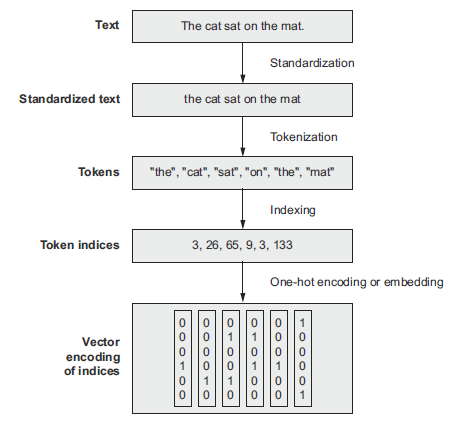

### Text standardization

*Text standardization is a basic form of feature engineering that aims to erase
encoding differences that you don’t want your model to have to deal with. It’s not
exclusive to machine learning, either — you’d have to do the same thing if you were
building a search engine.*

- omzetten naar lowercase
- leestekens verwijderen
- speciale karakters omzetten (bv. `'é'` door `'e'` vervangen)
- *stemming*: woorden terugbrengen naar hun 'stam' (bv. `'speelt'` vervangen door `'speel'`)
- *lemmatization*: gelijkaardig als 'stemming', maar hier wordt het woord teruggebracht naar de 'lemma', de vorm die we bijv. in het woordenboek terugvinden (bv. `'speelt'` vervangen door `'spelen'`)

Voor het verschil tussen 'stemming' en 'lemmitization', zie bijv. https://towardsdatascience.com/stemming-vs-lemmatization-in-nlp-dea008600a0.

Neem als voorbeeld de volgende 2 zinnen:

- `"sunset came. i was staring at the Mexico sky. Isnt nature splendid??"`
- `"Sunset came; I stared at the México sky. Isn’t nature splendid?"`

Wanneer we al deze transformaties toepassen op beide zinnen, krijgen we in beide gevallen de volgende zin als resultaat:

- `"sunset came i [stare] at the mexico sky isnt nature splendid"`

We gooien hiermee wel informatie weg natuurlijk! Stel dat we bijv. expliciet op zoek gaan naar vragen, dan is het geen goed idee om de vraagtekens te verwijderen. En in een sentimentanalyse zeggen die twee vraagtekens in de eerste zin ook iets over hoeveel diegene die de zin heeft geschreven de natuur bewondert.

### Text splitting (tokenization)

Na het standaardiseren van de tekst, wordt die opgesplitst in **tokens** (= tokenization):

- **Word-level tokenization**: opsplitsen obv spaties en leestekens zodat de woorden afgezonderd worden. Soms worden woorden ook nog gesplitst, bijv. `'called'` wordt dan `'call'` + `'ed'`.
- **N-gram tokenization**: men neemt N woorden als token, bijv. bigram of 2-gram tokens bestaan uit 2 woorden.
- **Character-level tokenization**: de tokens zijn hier de individuele karakters van de tekst. Wordt niet zo vaak gebruikt, tenzij bij speech recognition of text generation.

Er zijn twee soorten modellen voor het verwerken van tekst:

- **Sequence models**: Hierin wordt de volgorde van de tokens gerespecteerd en die modellen maken daarom vaak gebruik van word-level tokenization. Worden vooral gebruikt bij deep learning.
- **Bag-of-words models**: Hierin speelt de volgorde geen rol en dus gebruikt men hier vaak N-gram tokenization zodat er toch wat rekening met de volgorde wordt gehouden. Worden vooral gebruikt bij shallow learning.

Voorbeeldje van 2-gram tokenization.

In [ ]:
import re  # regular expressions

# input string
doc = "The cat sat on the mat."
print('Input:')
print(doc)

# standardization
doc = re.sub(r'[^\w\s]', '', doc.lower())
print("\nStandardize:")
print(doc)

# Splitting
tokens = doc.split()
print("\nSplit:")
print(tokens)

# 2-grams
def find_ngrams(tokens, n):
    return zip(*[tokens[i:] for i in range(n)])

unigrams = set([(token, ) for token in tokens])
bigrams = set([bigram for bigram in find_ngrams(tokens, n=2)])

print("\nBigrams:")
print(unigrams.union(bigrams))

Input:
The cat sat on the mat.

Standardize:
the cat sat on the mat

Split:
['the', 'cat', 'sat', 'on', 'the', 'mat']

Bigrams:
{('the', 'cat'), ('cat',), ('on', 'the'), ('sat',), ('the', 'mat'), ('sat', 'on'), ('mat',), ('on',), ('cat', 'sat'), ('the',)}


Merk op dat zowel de afzonderlijke woorden als de paren van woorden in de uiteindelijke 2-gram zitten! Er wordt ook gebruik gemaakt van een Python `set` omdat de volgorde niet van belang is. Op die manier worden ook duplicaten verwijderd, zoals in dit voorbeeld het woord `'the'`. Bij sequence models wordt er natuurlijk gebruik gemaakt lists of arrays die wel de volgorde van de reeks behouden.

### Vocabulary indexing

De tokens moeten tenslotte omgezet worden naar getallen. Meestal geeft men een index aan alle tokens (= de **vocabulary**) die in de trainingset worden gevonden, bijv:

```python
vocabulary = {}
for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary)
```

In ons voorbeeldje van hierboven hebben we al de unieke tokens (doordat we een `set` hebben gebruikt), en dus is het vrij eenvoudig om de 'vocabulary' te creëren:

In [ ]:
vocabulary = {token:i for i, token in enumerate(unigrams.union(bigrams))}
vocabulary

{('the', 'cat'): 0,
 ('cat',): 1,
 ('on', 'the'): 2,
 ('sat',): 3,
 ('the', 'mat'): 4,
 ('sat', 'on'): 5,
 ('mat',): 6,
 ('on',): 7,
 ('cat', 'sat'): 8,
 ('the',): 9}

De integers kunnen dan omgezet worden via one-hot-encoding:

```python
def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1
    return vector
```

In ons voorbeeldje kan dat eenvoudigweg als volgt:

In [ ]:
import numpy as np

ids = np.arange(len(vocabulary))
one_hot = {token: (ids==id).astype(int) for token, id in vocabulary.items()}
one_hot

{('the', 'cat'): array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('cat',): array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('on', 'the'): array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 ('sat',): array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 ('the', 'mat'): array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 ('sat', 'on'): array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 ('mat',): array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 ('on',): array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('cat', 'sat'): array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 ('the',): array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

Zoals we al weten wordt de 'vocabulary' meestal beperkt tot de meest voorkomende tokens. Herinner je de IMDB dataset waar we bijv. het aantal woorden hebben beperkt tot 10 000. Doen we dat niet, dan zouden we een te grote 'feature space' hebben (want elke woord is hier een feature).

Het kan gebeuren dat nieuwe data een woord bevatten die niet in de 'vocabulary' voorkomt, zeker als we die laatste beperken tot de meest voorkomende woorden. Hoe gaan we hiermee om? Wel, we voegen eenvoudigweg een 'out of vocabulary' (OOV) index toe. Het OOV token - bijv. `'[UNK]'` van 'unknown' - krijgt meestal index 1. Waarom niet 0? Omdat dit gereserveerd is voor de 'mask token'. Samenvattend:

- **mask token** (index 0) = "ignore me, I'm not a word"
- **out-of-vocabulary token** (index 1) = "here was a word which we did not recognize"

Het 'mask token' wordt ook gebruikt om **padding** toe te passen, want de input reeksen moeten natuurlijk even lang zijn. Laten we dat even illustreren met een eenvoudig voorbeeldje, waarwij we 'word-level tokenization' toepassen:

In [ ]:
# inputs
docs = ["The cat sat on the mat.",
        "The cat catches two mice."]

# standardization and tokenization
docs = [re.sub(r'[^\w\s]', '', doc.lower()).split() for doc in docs]
tokens = set([token for doc in docs for token in doc])

# remove 'the' and 'on' from token set
ignore = {'the', 'on'}
tokens = tokens.difference(ignore)

# create vocabulary
voc = {token:i+2 for i, token in enumerate(tokens)}
unknown = '[UNK]'
voc[unknown] = 1
print("Vocabulary:")
print(voc)

# indexing
samples = [[voc[token] if token in voc else voc[unknown] for token in doc] for doc in docs]

# padding
n = max([len(sample) for sample in samples])
X = np.zeros((len(samples), n))
for i, sample in enumerate(samples):
    X[i, :len(sample)] = sample
print("\nInput matrix:")
print(X)

Vocabulary:
{'cat': 2, 'catches': 3, 'mice': 4, 'two': 5, 'sat': 6, 'mat': 7, '[UNK]': 1}

Input matrix:
[[1. 2. 6. 1. 1. 7.]
 [1. 2. 3. 5. 4. 0.]]


De woorden `'the'` en `'on'` werden uit de token set verwijderd, en we zien dat in de finale input matrix `X` die woorden inderdaad door OOV-index 1 zijn vervangen. Het tweede document bevat 1 woord minder dan het eerste, en dat ontbrekende woord werd met 0 opgevuld.

### Defining class `Vectorizer`

We kunnen deze drie stappen - standardization, tokenization en indexing - beter samenbrengen in een klasse `Vectorizer`:

In [ ]:
import string

class Vectorizer:

    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

Laten we dat eens uittesten op ons voorbeeldje:

In [ ]:
docs = ["The cat sat on the mat.",
        "The cat catches two mice."]

vectorizer = Vectorizer()
vectorizer.make_vocabulary(docs)
vectorizer.vocabulary

{'': 0,
 '[UNK]': 1,
 'the': 2,
 'cat': 3,
 'sat': 4,
 'on': 5,
 'mat': 6,
 'catches': 7,
 'two': 8,
 'mice': 9}

In het boek wordt dit uitgetest met een Haiku:

In [ ]:
vectorizer = Vectorizer()
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

Er is een `encode` methode om een document om te zetten naar indices obv de 'vocabulary':

In [ ]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[2, 3, 5, 7, 1, 5, 6]


En er is een `decode` methode om de indices terug om te zetten naar de text, waarbij uiteraard de tokens uit de 'vocabulary' worden gebruikt:

In [ ]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


Het woord `'still'` komt niet voor in de 'vocabulary' en werd dus vervangen door `'[UNK]'`.

### Using the Keras `TextVectorization` layer

Performant zal de code van de `Vectorizer` klasse niet zijn als we in de praktijk met zeer grote datasets werken. Daarom is het aan te raden om gebruik te maken van de `TextVectorization` klasse in Keras:

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",  # "count", "multi_hot", or "tf_idf"
)
text_vectorization.adapt(text_data)  # creates vocabulary
text_vectorisation.get_vocabulary()  # returns vocabulary
text_vectorisation(text_data)  # vectorizes text_data

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",  # configures the layer to return sequences of words encoded as integer indices.
)

Je merkt dat dit een Keras layer is die je dus aan een model kan toevoegen. Bijv. mbv de functional API:

```python
text_input = keras.Input(shape=(), dtype="string")  # Create a symbolic input that expects strings.
vectorized_text = text_vectorization(text_input)  # Apply the text vectorization layer to it.
embedded_input = keras.layers.Embedding(...)(vectorized_text)
output = ...
model = keras.Model(text_input, output)
```


Standaard zal `TextVectorization`:
- alles omzetten naar lowercase,
- leestekens verwijderen,
- en splitsen obv 'white spaces'.

Laten we dat eens uittesten op het haiku voorbeeldje:

In [ ]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)

In [ ]:
text_vectorization.get_vocabulary()  # retourneert vocabulary

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

In [ ]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)  # coderen
print(encoded_sentence)

tf.Tensor([ 7  3  5  9  1  5 10], shape=(7,), dtype=int64)


In [ ]:
vocabulary = text_vectorization.get_vocabulary()
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)  # decoderen
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


Het is uiteraard mogelijk om zelf een `standardize` en een `split` functie mee te geven. Maar pas op! Die functies moeten werken met TensorFlow strings, niet met Python strings!

In [ ]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

Het voorbeeld hierboven is equivalent met de default implementatie van `TextVectorization`.

Je kan `TextVectorization` ook toevoegen aan een `tf.data` pipeline:

```python
# string_dataset would be a dataset that yields string tensors.
int_sequence_dataset = string_dataset.map(
    text_vectorization,   # TextVectorization instance
    num_parallel_calls=4  # used to parallelize the map() call across multiple CPU cores
)
```

Dat is een interessantere optie als het model met GPU wordt getraind. De `TextVectorization` layer werkt namelijk alleen maar met CPU, en als het onderdeel is van het model, dan moeten de andere lagen wachten tot de CPU klaar is met de preprocessing (synchroon). Is het onderdeel van een data-pipeline, dan hoeft het model niet te wachten en kan het al beginnen met het verwerken van de eerste batches terwijl de volgende batches nog worden verwerkt door de data-pipeline (asynchroon).

---